In [1]:
import pandas as pd
import numpy as np
from os import getcwd, listdir, path
import matplotlib.pyplot as plt
import sys

In [2]:
import utils
import itertools

import fitness.soga_fitness
from fitness.soga_fitness import *

In [3]:
fitness = []
#SKETCHES
#ex_names = ['mog1_sketch0_30', 'mog1_sketch1_30', 'mog1_sketch2_30', 'mog1_sketch3_30']
#programs = ['mog1', 'mog1', 'mog1', 'mog1']
#ex_names = ['if_sketch0_30', 'if_sketch1_30', 'if_sketch2_30', 'if_sketch3_30']
#programs = ['if', 'if', 'if', 'if']
#ex_names = ['biasedtugwar_nosketch_30', 'biasedtugwar_sketch1_30', 'biasedtugwar_sketch2_30', 'biasedtugwar_sketch3_30']
#programs = ['biasedtugwar', 'biasedtugwar', 'biasedtugwar', 'biasedtugwar']
ex_names = ['easytugwar_sketch0_30', 'easytugwar_sketch1_30', 'easytugwar_sketch2_30', 'easytugwar_sketch3_30']
programs = ['easytugwar', 'easytugwar', 'easytugwar', 'easytugwar']

labels = ['Nosketch', 'Sketch1', 'Sketch2', 'Sketch3']

#NOSKETCH
#ex_names = ['biasedtugwar_nosketch_30', 'csi_nosketch','easytugwar_sketch0_30', 'eyecolor_nosketch', 'hurricane_nosketch', 'if_sketch0_30', 'mixedcondition_sketch0_30', 'mog1_sketch0_30', 'multiplebranches_sketch0_30']
#ex_names = ['biasedtugwar_sketch1_30', 'burglary_sketch1', 'csi_sketch1','easytugwar_sketch1_30', 'if_sketch1_30', 'mixedcondition_sketch1_30', 'mog1_sketch1_30' ]
#programs = ['biasedtugwar', 'csi', 'easytugwar', 'eyecolor', 'hurricane', 'if', 'mixedcondition', 'mog1', 'multiplebranches']
#labels = programs


In [4]:

i = 0
for name in ex_names:
    file_path = path.join(getcwd(), "..", "results", name, "best_fitness.csv")
    data_pd = pd.read_csv(file_path, header=None)
    #convert to numpy array
    data = data_pd.values
    #replace nan with -np.inf
    #compute median and interquartile range of each row
    data = np.nan_to_num(data, nan=-10000)
    median = np.median(data, axis=1)
    
    q1 = np.percentile(data, 25, axis=1)
    q3 = np.percentile(data, 75, axis=1)

    median = np.where(median == -10000, -np.inf, median)
    q1 = np.where(q1 == -10000, -np.inf, q1)
    q3 = np.where(q3 == -10000, -np.inf, q3)

    df = pd.DataFrame(list(map(list, itertools.zip_longest(*[median, q1, q3], fillvalue=None))), columns=['median', 'q1', 'q3'])
    #df.to_csv('Figure6/mog1_'+labels[i]+'.tsv', sep="\t", index=False) 
    #wherere median, q1, q3 are -1000, replace with -np.inf
    
    #q1 = np.where(q1 == -1000, -np.inf, q1)
    #q3 = np.where(q3 == -1000, -np.inf, q3)
    fitness.append([median, q1, q3])
    i += 1

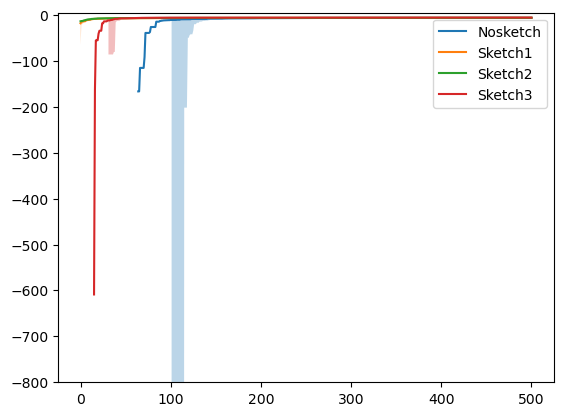

In [5]:
for i in range(len(ex_names)):
    plt.plot(range(len(fitness[i][0])), fitness[i][0], label=labels[i])
    plt.fill_between(range(len(fitness[i][0])), fitness[i][1], fitness[i][2], alpha=0.3)
plt.legend()
plt.ylim(-800, 5)
plt.show()

run  Rominas-Air.lan_25_1_21_211820_257045_27013_26  did not converge


/var/folders/wj/s0d4084s7rz93njmy26_wwnw0000gn/T/ipykernel_15735/3852971573.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fitness_5000, labels=labels)


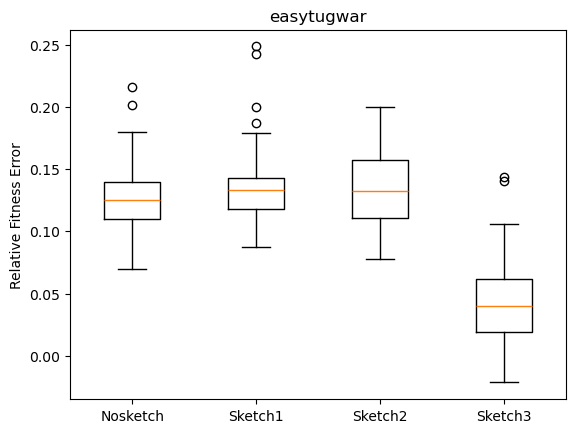

In [6]:
#create a boxplot with the median and the interquartile range
import pandas as pd
fitness_5000 = []
i = 0
for name in ex_names:
    fitness_5000_i, _ = utils.read_fitness_and_program(name)
    #remove nan values
    fitness_5000_i = np.array(fitness_5000_i)
    fitness_5000_i = fitness_5000_i[~np.isnan(fitness_5000_i)]
    #calculate the baseline
    path_baseline = path.join(getcwd(), "..", "baselines", programs[i] + ".soga")
    file = open(path_baseline)
    text_baseline = ''
    for line in file.readlines():
        text_baseline += line + ' '

    fitness_bl = likelihood_of_program_wrt_data(text_baseline, program=programs[i], data_size = 5000)
    fitness_5000_i = (np.abs(fitness_5000_i) - np.abs(fitness_bl)) / np.abs(fitness_bl)
    fitness_5000.append(fitness_5000_i)
    i += 1

plt.boxplot(fitness_5000, labels=labels)
plt.ylabel('Relative Fitness Error')
plt.title(programs[0])
plt.show()



In [8]:

df = pd.DataFrame(list(map(list, itertools.zip_longest(*fitness_5000, fillvalue=None))), columns=labels)
df.head(31)
#df.to_csv('Figure5/'+programs[0]+'.tsv', sep="\t", index=False) 

,Nosketch,Sketch1,Sketch2,Sketch3
0,0.126627,0.104383,0.148747,0.061675
1,0.112118,0.149261,0.112155,0.013397
2,0.138541,0.087706,0.126494,0.019918
3,0.069898,0.199803,0.088257,0.046438
4,0.201467,0.136305,0.133394,0.007433
5,0.128576,0.119052,0.192834,0.029623
6,0.119257,0.130496,0.199689,0.054990
7,0.128812,0.141767,0.106058,0.008143
8,0.118989,0.150058,0.161893,0.013192
9,0.099350,0.122666,0.162423,0.143789
